In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Set visualization style
sns.set(style="whitegrid", palette="muted")

In [20]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [21]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
# Checking the shape of the dataset
data.shape

(7043, 21)

In [24]:
# Checking for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the dataset 

In [25]:
#droping the CustomerID column as it is not useful for analysis
data.drop('customerID', axis=1, inplace=True)

In [26]:
# Convert TotalCharges to numeric (handle whitespace values)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Remove rows with missing values
data.dropna(inplace=True)

# Create numeric target variable for correlation analysis (Yes=1, No=0)
data['Churn_Num'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("Dataset shape:", data.shape)
display(data.head())

Dataset shape: (7032, 21)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Num
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


 figure 1: Distribution of tenure kdeplot
the first step is to check the length of customer relationship with the company.through tenure.

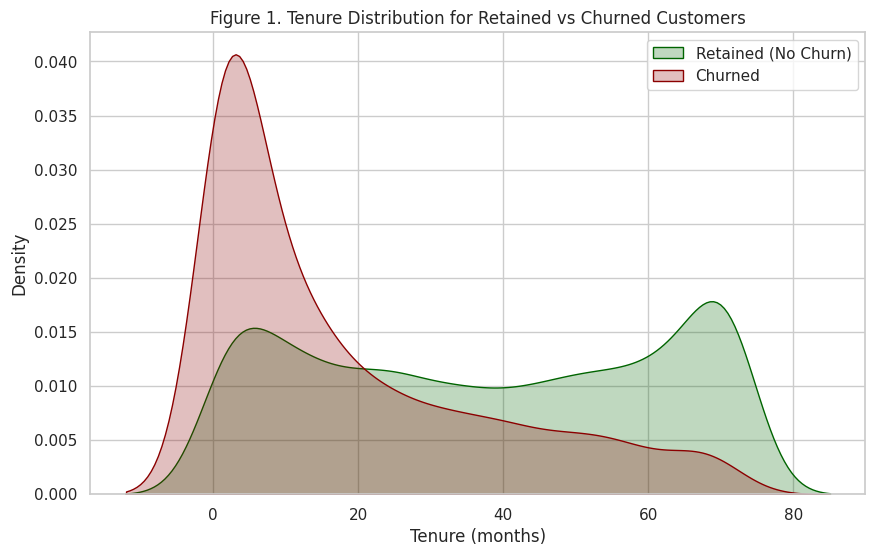

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Churn'] == 'No']['tenure'], color='#006400', fill=True, label='Retained (No Churn)')
sns.kdeplot(data[data['Churn'] == 'Yes']['tenure'], color='#8B0000', fill=True, label='Churned')
plt.title('Figure 1. Tenure Distribution for Retained vs Churned Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend()
plt.show()

## insights

customers with short tenure are more likely to churn

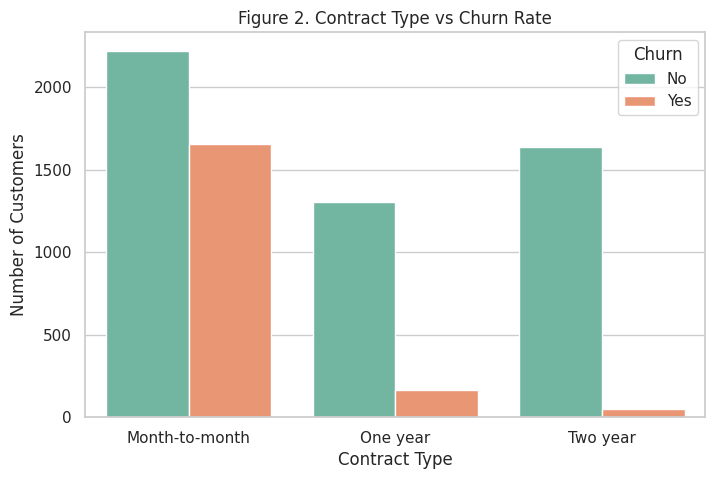

In [28]:
## check the relationship between contract type and churn rate
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set2')
plt.title('Figure 2. Contract Type vs Churn Rate')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.show()

### insights 
month-to-month contracts have a number of churn rates as compared to the other two contract types

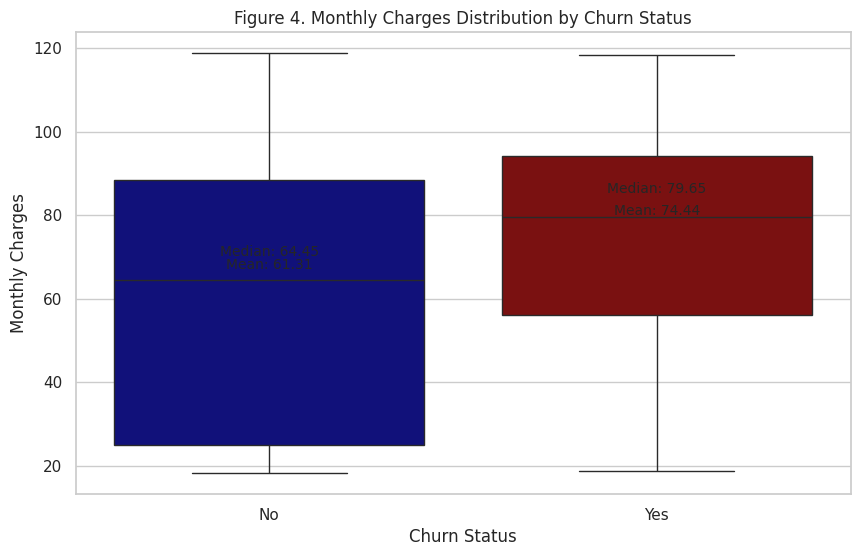

In [29]:
## check the relationship between monthly charges and churn rate using boxplot(annotate mean,median and color based on churn status)
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, x='Churn', y='MonthlyCharges', hue='Churn', palette={'Yes':'#8B0000','No':'#00008B'}, dodge=False)
if ax.get_legend() is not None:
    ax.get_legend().remove()
plt.title('Figure 4. Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')

# Annotate mean and median
for i, (churn_status, group) in enumerate(data.groupby('Churn')):
    mean_val = group['MonthlyCharges'].mean()
    median_val = group['MonthlyCharges'].median()
    plt.text(i, mean_val + 5, f'Mean: {mean_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, median_val + 5, f'Median: {median_val:.2f}', ha='center', va='bottom', fontsize=10)

## INSIGHTS
higher monthly charges are associated with high churn rates 

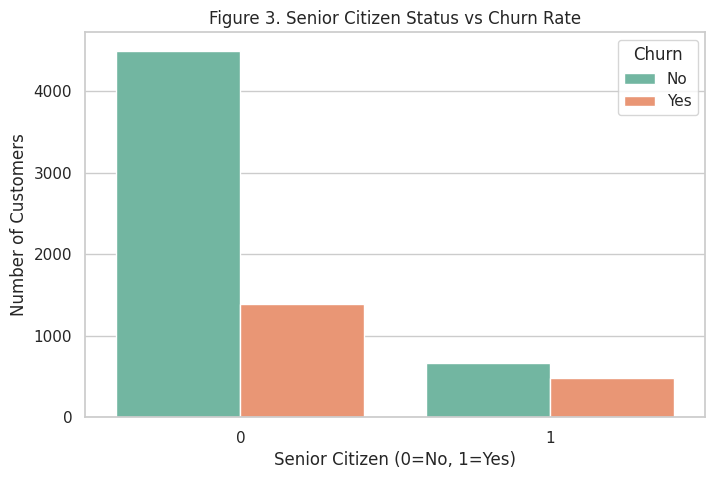

In [30]:
### check relationship between senior citizen and churn rate using bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, palette='Set2')
plt.title('Figure 3. Senior Citizen Status vs Churn Rate')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.show()

#### insights 

Customers who are not senior citizen tends to discontinue service more than senior citizens

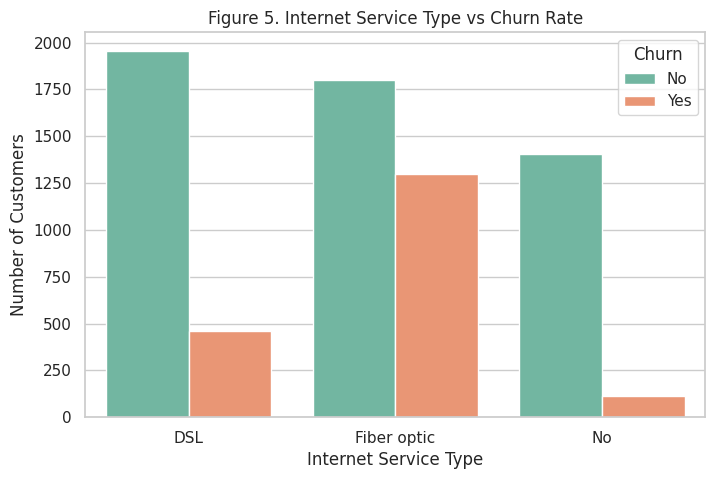

In [31]:
## checking the relationship between internet service and churn rate
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=data, palette='Set2')
plt.title('Figure 5. Internet Service Type vs Churn Rate')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.show()

### insights
fiber Optic service has high churn rates

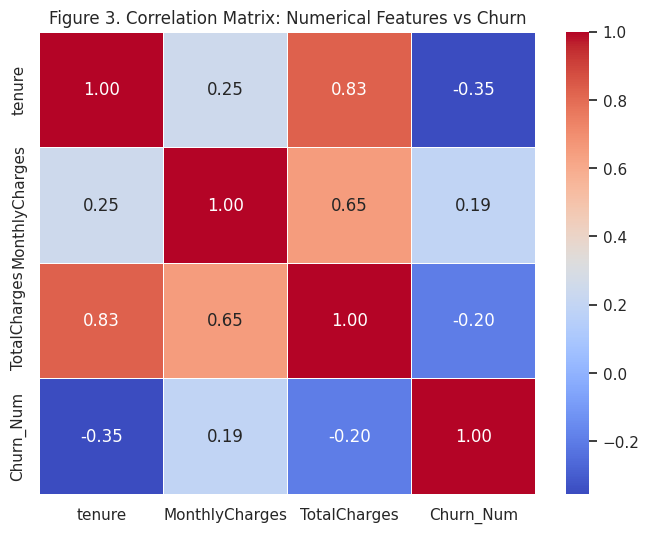

In [35]:
# Select numerical columns for correlation analysis
corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Num']

plt.figure(figsize=(8, 6))
sns.heatmap(data[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Figure 3. Correlation Matrix: Numerical Features vs Churn')
plt.show()

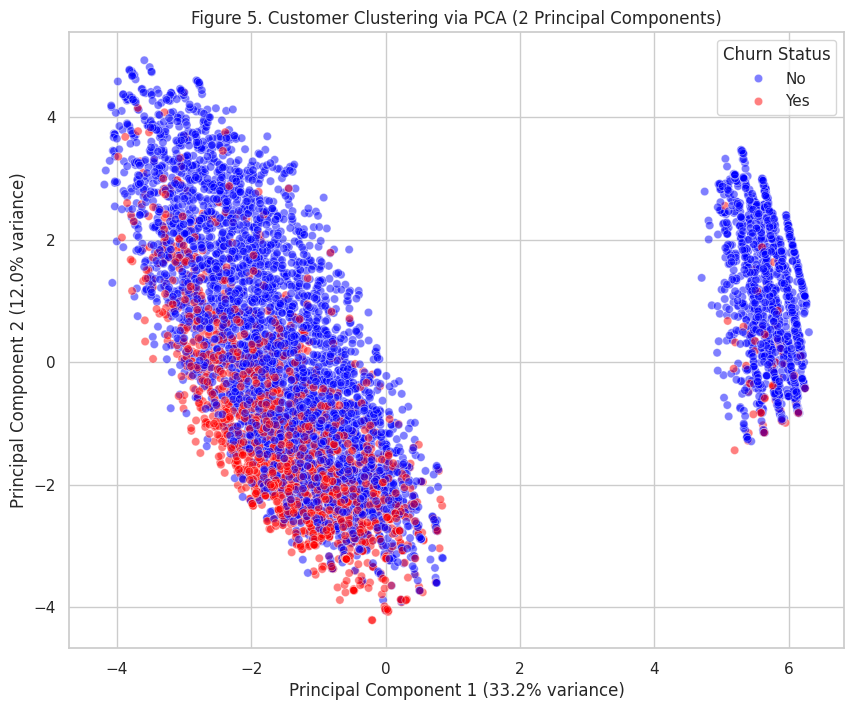

In [36]:
# Prepare features for PCA (excluding ID and target columns)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler


X = data.drop(['Churn', 'Churn_Num'], axis=1)
X = pd.get_dummies(X, drop_first=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create PCA dataframe for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Churn'] = data['Churn'].values

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=pca_df, alpha=0.5, palette={'Yes':'red', 'No':'blue'})
plt.title('Figure 5. Customer Clustering via PCA (2 Principal Components)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend(title='Churn Status')
plt.show()